# <center>Oil Properties Comparison</center>

Right now we need to see why we are getting negative numbers in our Dissolution weatherer in Nathan's model, and one of the big differences is that he is using Alaska North Slope Oil & Gas (<b>AD01346</b>), while our unit tests are using Alaska North Slope (Middle Pipeline) (<b>AD01759</b>)

In [20]:
%pylab inline
import numpy as np
from scipy.optimize import curve_fit

from oil_library import get_oil, get_oil_props, _get_db_session
from oil_library.models import (Base, ImportedRecord, Oil,
                                Density, Toxicity, Category)


Populating the interactive namespace from numpy and matplotlib


In [19]:
op1 = get_oil_props(u'ALASKA NORTH SLOPE (MIDDLE PIPELINE)')
print op1
print op1._r_oil.adios_oil_id

oil_library.oil_props.OilProps(oil_=<Oil("ALASKA NORTH SLOPE (MIDDLE PIPELINE)")>)
AD01759


In [15]:
session = _get_db_session()
session.query(Oil).filter(Oil.name.like('%ALASKA NORTH SLOPE%')).all()


[<Oil("ALASKA NORTH SLOPE, OIL & GAS")>,
 <Oil("ALASKA NORTH SLOPE (MIDDLE PIPELINE)")>,
 <Oil("ALASKA NORTH SLOPE (NORTHERN PIPELINE)")>,
 <Oil("ALASKA NORTH SLOPE")>]

In [18]:
op2 = get_oil_props(u'ALASKA NORTH SLOPE, OIL & GAS')
print op2
print op2._r_oil.adios_oil_id

oil_library.oil_props.OilProps(oil_=<Oil("ALASKA NORTH SLOPE, OIL & GAS")>)
AD01346


In [33]:
print zip(*[(c.vapor_temp_k, c.fraction) for c in op1._r_oil.cuts]) + ['bo']

[(313.15, 353.15, 393.15, 433.15, 473.15, 573.15, 673.15, 773.15, 873.15, 973.15), (0.03, 0.07, 0.13, 0.19, 0.25, 0.42, 0.6, 0.76, 0.88, 0.95), 'bo']


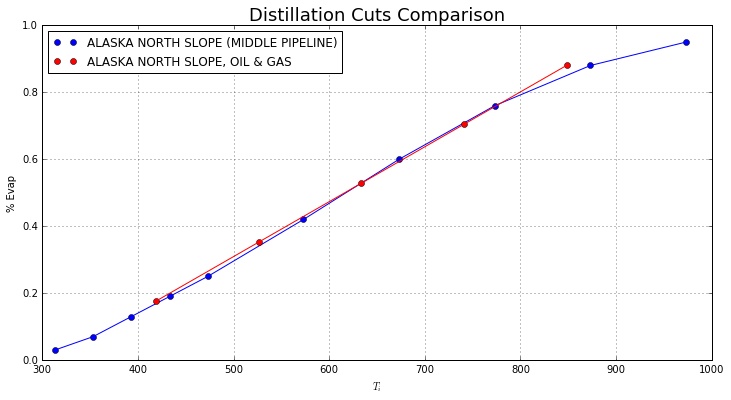

In [37]:
plt.figure(1, figsize=(12,6))
plt.subplot(111)

plt.plot(*zip(*[(c.vapor_temp_k, c.fraction) for c in op1._r_oil.cuts]) + ['bo'],
         label=op1.name)
plt.plot(*zip(*[(c.vapor_temp_k, c.fraction) for c in op1._r_oil.cuts]) + ['b-'])

plt.plot(*zip(*[(c.vapor_temp_k, c.fraction) for c in op2._r_oil.cuts]) + ['ro'],
         label=op2.name)
plt.plot(*zip(*[(c.vapor_temp_k, c.fraction) for c in op2._r_oil.cuts]) + ['r-'])

plt.xlabel(r'$T_i$')
plt.ylabel('% Evap')
plt.grid()
plt.title(r'Distillation Cuts Comparison', fontsize=18)

plt.legend(loc='upper left')

In [44]:
print op1.component_types
print op1.mass_fraction
print op1.mass_fraction[op1.component_types == 'Aromatics']
print op1.boiling_point[op1.component_types == 'Aromatics']

['Saturates' 'Aromatics' 'Saturates' 'Aromatics' 'Saturates' 'Aromatics'
 'Aromatics' 'Aromatics' 'Saturates' 'Aromatics' 'Saturates' 'Aromatics'
 'Saturates' 'Aromatics' 'Saturates' 'Aromatics' 'Saturates' 'Aromatics'
 'Resins' 'Asphaltenes']
[ 0.01474116  0.01525884  0.01140532  0.02859468  0.00366068  0.05633932
  0.06        0.06        0.085       0.085       0.09        0.09        0.08
  0.08        0.06        0.06        0.0132003   0.0132003   0.07662164
  0.01697776]
[ 0.01525884  0.02859468  0.05633932  0.06        0.06        0.085       0.09
  0.08        0.06        0.0132003 ]
[ 313.15  353.15  393.15  433.15  473.15  573.15  673.15  773.15  873.15
  973.15]


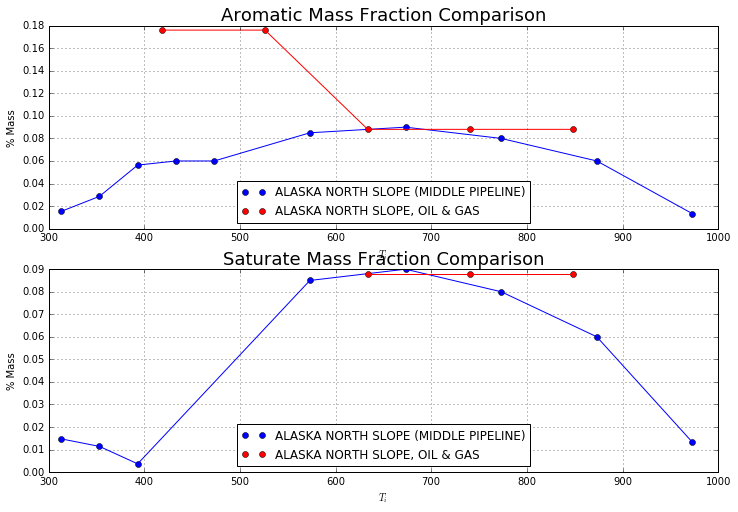

In [59]:
plt.figure(1, figsize=(12,8))
plt.subplot(211)

for op, c in ((op1, 'b'), (op2, 'r')):
    masses = op.mass_fraction[op.component_types == 'Aromatics']
    boiling_points = op.boiling_point[op.component_types == 'Aromatics']

    plt.plot(boiling_points, masses, '{}o'.format(c), label=op.name)
    plt.plot(boiling_points, masses, '{}-'.format(c))

plt.xlabel(r'$T_i$')
plt.ylabel('% Mass')
plt.grid()
plt.title(r'Aromatic Mass Fraction Comparison', fontsize=18)

plt.legend(loc='lower center')

plt.subplot(212)

for op, c in ((op1, 'b'), (op2, 'r')):
    masses = op.mass_fraction[op.component_types == 'Saturates']
    boiling_points = op.boiling_point[op.component_types == 'Saturates']

    plt.plot(boiling_points, masses, '{}o'.format(c), label=op.name)
    plt.plot(boiling_points, masses, '{}-'.format(c))

plt.xlabel(r'$T_i$')
plt.ylabel('% Mass')
plt.grid()
plt.title(r'Saturate Mass Fraction Comparison', fontsize=18)

plt.legend(loc='lower center')

In [68]:
for op in (op1, op2):
    print 'Name: "{}"'.format(op.name)

    total_fmass = 0.0
    for sara_type in ('Aromatics', 'Saturates'):
        masses = op.mass_fraction[op.component_types == sara_type]
        print '\tsum({}): {}'.format(sara_type, masses.sum())
        total_fmass += masses.sum()

    print '\tTotal Evaporable Fractional Mass: {}\n'.format(total_fmass)


Name: "ALASKA NORTH SLOPE (MIDDLE PIPELINE)"
	sum(Aromatics): 0.548393137845
	sum(Saturates): 0.358007459717
	Total Evaporable Fractional Mass: 0.906400597562

Name: "ALASKA NORTH SLOPE, OIL & GAS"
	sum(Aromatics): 0.616357908726
	sum(Saturates): 0.264153389454
	Total Evaporable Fractional Mass: 0.88051129818

